## Newton's Method

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Hyperparameters
epsilon = 1E-8
alpha = 0.01
beta = 0.5

In [3]:
# Computes f(x)
def f_loss(x,A,b):
    return np.sum((x - b)**2)/2 - np.sum(np.log(1 - A@x))

In [4]:
# Computes a tensor of the matrices formed by
# the outer product of the rows of A
def f_outer_products(A,n,m):
    AAT = np.zeros((n,n,m))
    for i in np.arange(m):
        AAT[:,:,i] = np.outer(A[i],A[i])
    return AAT

In [5]:
# Computes the Newton step and decrement
def f_step_decrement(n,m,A,b,AAT,x):
    sumg = np.zeros(n)
    suml = np.zeros((n,n))
    for i in np.arange(m):
        L = 1 - A[i]@x
        sumg += A[i]/L
        suml += AAT[:,:,i]/L**2
    gradient = x - b + sumg
    laplacian = np.eye(n) + suml
    delta_x_nt = -np.linalg.inv(laplacian)@gradient
    lambda2 = -gradient@delta_x_nt
    return delta_x_nt, lambda2, gradient

In [6]:
# Computes the Newton step and decrement (vectorized version)
def f_step_decrement_vectorized(n,m,A,b,AAT,x):
    L = 1 - A@x
    gradient = x - b + (1/L)@A
    laplacian = np.eye(n) + np.sum(AAT/L**2,axis=2)
    delta_x_nt = -np.linalg.inv(laplacian)@gradient
    lambda2 = -gradient@delta_x_nt
    return delta_x_nt, lambda2, gradient

In [7]:
# Backtracking line search
def f_backtracking_line_search(x,delta_x,gradient,A,b,alpha,beta):
    t = 1
    while 1:
#     for i in np.arange(10):
        f = f_loss(x,A,b)
        if np.min(1 - A@(x+t*delta_x)) > 0:
            fp = f_loss(x+t*delta_x,A,b)
        else:
            fp = np.inf
        
        if fp < f + alpha*t*gradient@delta_x:
            break
            
        t = beta*t
            
    return t

In [8]:
# Newton's Method
def f_Newtons_Method(n,m,epsilon,alpha,beta,A,b,it=100):
    x = np.zeros(n)
    Loss = np.zeros(it)
    lambda2_v = np.zeros(it)
    t_v = np.zeros(it)
    
    AAT = f_outer_products(A,n,m)
    
    for i in np.arange(it):
    #     print(i)
        Loss[i] = f_loss(x,A,b)
        # delta_x, lambda2, gradient = f_step_decrement(n,m,A,b,AAT,x)
        delta_x, lambda2, gradient = f_step_decrement_vectorized(n,m,A,b,AAT,x)
        lambda2_v[i] = lambda2
        if lambda2/2 <= epsilon:
            break
        t = f_backtracking_line_search(x,delta_x,gradient,A,b,alpha,beta)
        t_v[i] = t
        x += t*delta_x
    return x, Loss[0:i+1], lambda2_v[0:i+1], t_v[0:i]

In [9]:
# Plot loss, Newton decrement, and step size
def f_Plot(Loss,lambda2_v,t_v):
    plt.plot(Loss)
    plt.title("Loss")
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.grid()
    plt.show()

    plt.plot(np.sqrt(lambda2_v))
    plt.title("Newton Decrement")
    plt.xlabel("Iteration")
    plt.ylabel("Newton Decrement")
    plt.grid()
    plt.show()

    plt.plot(np.sqrt(t_v))
    plt.title("Step Size")
    plt.xlabel("Iteration")
    plt.ylabel("Step Size")
    plt.grid()
    plt.show()

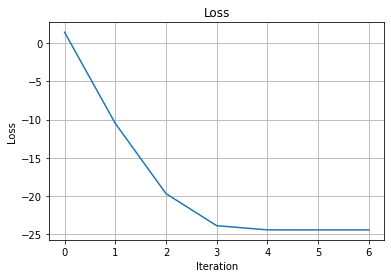

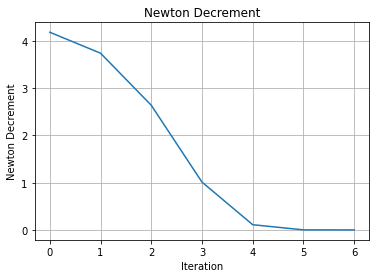

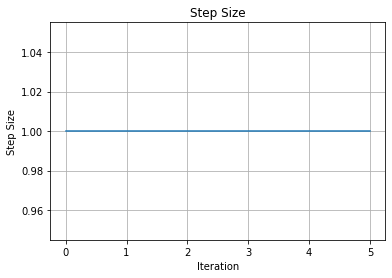

λ^2/2 = 6.9094545155485276e-15


In [10]:
n = 10
m = 20
A = np.random.uniform(0,1,(m,n))
b = np.random.uniform(0,1,n)
x, Loss, lambda2_v, t_v = f_Newtons_Method(n,m,epsilon,alpha,beta,A,b)

f_Plot(Loss,lambda2_v,t_v)
print("λ^2/2 =",lambda2_v[-1]/2)

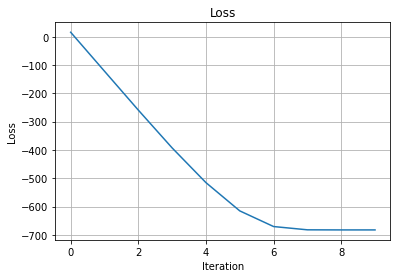

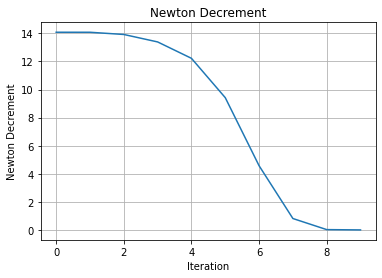

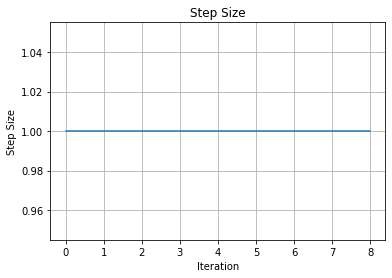

λ^2/2 = 9.95272411804952e-11


In [11]:
n = 100
m = 200
A = np.random.uniform(0,1,(m,n))
b = np.random.uniform(0,1,n)
x, Loss, lambda2_v, t_v = f_Newtons_Method(n,m,epsilon,alpha,beta,A,b)

f_Plot(Loss,lambda2_v,t_v)
print("λ^2/2 =",lambda2_v[-1]/2)

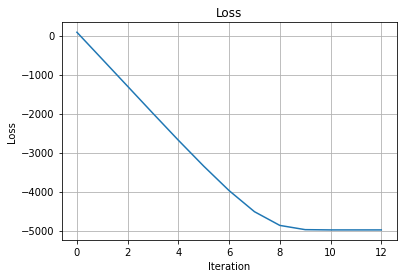

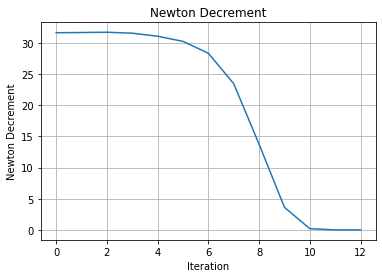

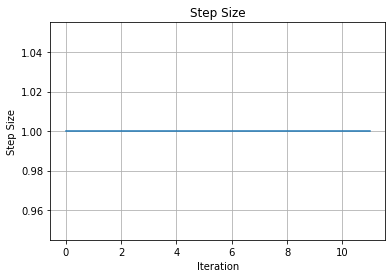

λ^2/2 = 1.0955183889419634e-17


In [12]:
n = 500
m = 1000
A = np.random.uniform(0,1,(m,n))
b = np.random.uniform(0,1,n)
x, Loss, lambda2_v, t_v = f_Newtons_Method(n,m,epsilon,alpha,beta,A,b)

f_Plot(Loss,lambda2_v,t_v)
print("λ^2/2 =",lambda2_v[-1]/2)